# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from PIL import Image
from keras.preprocessing import image
 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers

In [4]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from keras import optimizers
from keras.optimizers import Optimizer
from tensorflow.keras.models import Sequential



In [5]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D
                        

In [6]:
from keras import models
from keras import layers
import tensorflow as tf

In [7]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [8]:
import os
import os.path
from pathlib import Path
import glob

In [9]:
from keras.models import Model

# Pre-Processing

In [10]:
Brain_CT_Path = Path("/content/Data")
JPG_Path = list(Brain_CT_Path.glob("**/*.jpg"))
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],JPG_Path))
JPG_Path_Series = pd.Series(JPG_Path,name="JPG").astype(str)
JPG_Labels_Series = pd.Series(JPG_Labels,name="CATEGORY")
Main_Data = pd.concat([JPG_Path_Series,JPG_Labels_Series],axis=1)

In [11]:
#print(JPG_Path)

In [12]:
#print(JPG_Labels)


In [13]:
#print(JPG_Path_Series)


In [14]:
#print(JPG_Labels_Series)


In [15]:
#print(Main_Data)

In [16]:
Main_Data["CATEGORY"].replace({"11[11]":"Hemorrhage","11[11]":"Hemorrhage","12[12]":"Hemorrhage","13[13]":"Hemorrhage",
                               "14[14]":"Hemorrhage","15[15]":"Hemorrhage","17[17]__":"Hemorrhage",
                               "19[19]":"Hemorrhage","1[1]":"Hemorrhage","20[20]_2":"Hemorrhage",
                               "21[21] _2":"Hemorrhage","2[2]":"Hemorrhage","3[3]":"Hemorrhage","4[4]":"Hemorrhage","5[5]":"Hemorrhage",
                               "6[6]":"Hemorrhage","7[7]":"Hemorrhage","8[8]":"Hemorrhage","9[9]":"Hemorrhage"},inplace=True)

In [17]:
#print(Main_Data)

In [18]:
Main_Data["CATEGORY"].replace({"N10[N10]":"Normal","N11[N11]":"Normal","N12[N12]":"Normal","N13[N13]":"Normal","N14[N14]":"Normal",
                               "N15[N15]":"Normal","N15[N15]":"Normal",
                               "N16[N16]":"Normal","N17[N17]":"Normal","N18[N18]":"Normal",
                               "N19[N19]":"Normal","N1[N1]":"Normal","N20[N20]":"Normal","N21[N21]":"Normal",
                               "N22[N22]":"Normal","N23[N23]":"Normal","N24[N24]":"Normal",
                               "N25[N25]":"Normal","N26[N26]":"Normal","N27[N27]":"Normal","N2[N2]":"Normal",
                               "N3[N3]":"Normal","N4[N4]":"Normal","N5[N5]":"Normal",
                               "N6[N6]":"Normal","N7[N7]":"Normal","N8[N8]":"Normal","N9[N9]":"Normal"},inplace=True)

# Labelled Data

In [19]:
print(Main_Data)

                                                    JPG    CATEGORY
0     /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_127.jpg  Hemorrhage
1      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_38.jpg  Hemorrhage
2      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_34.jpg  Hemorrhage
3      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_37.jpg  Hemorrhage
4      /content/Data/Hemorrhagic/KANAMA/5[5]/5_0_29.jpg  Hemorrhage
...                                                 ...         ...
6767           /content/Data/NORMAL/N1[N1]/N1_0_200.jpg      Normal
6768            /content/Data/NORMAL/N1[N1]/N1_0_46.jpg      Normal
6769           /content/Data/NORMAL/N1[N1]/N1_0_152.jpg      Normal
6770            /content/Data/NORMAL/N1[N1]/N1_0_95.jpg      Normal
6771            /content/Data/NORMAL/N1[N1]/N1_0_58.jpg      Normal

[6772 rows x 2 columns]


In [20]:
print(Main_Data["CATEGORY"].value_counts())

Normal        4105
Hemorrhage    2667
Name: CATEGORY, dtype: int64


In [21]:
Main_Data = Main_Data.sample(frac=1).reset_index(drop=True)

# Data Visualization

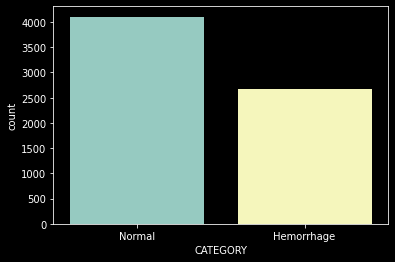

In [22]:
plt.style.use('dark_background')

sns.countplot(x=Main_Data["CATEGORY"])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

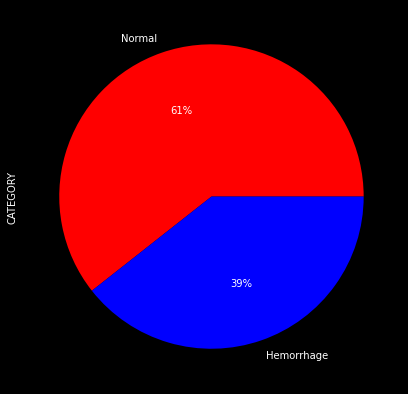

In [23]:
Colors=['red','blue']
Main_Data["CATEGORY"].value_counts().plot.pie(figsize=(7,7),autopct='%.0f%%',colors=Colors)
plt.show

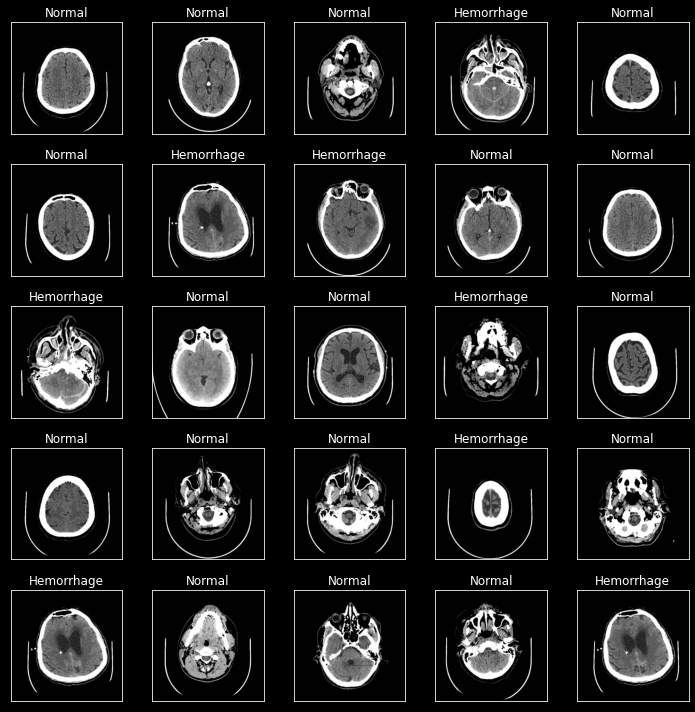

In [24]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data["JPG"][i]))
    ax.set_title(Main_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# Splitting

In [25]:
Train_Data,Test_Data = train_test_split(Main_Data,train_size=0.9,shuffle=True,random_state=42)

In [26]:
print("TRAIN SHAPE(rows,columns) : ",Train_Data.shape)
print("TEST SHAPE(rows,columns)  : ",Test_Data.shape)


TRAIN SHAPE(rows,columns) :  (6094, 2)
TEST SHAPE(rows,columns)  :  (678, 2)


# Augmentation

In [27]:
Generator = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.2,
                              shear_range=0.2,
                              rotation_range=40,
                              horizontal_flip=True,
                               fill_mode="nearest",
                               validation_split=0.1
                              )
Test_Generator = ImageDataGenerator(rescale=1./255)

In [28]:
Train_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                              target_size=(224,224),
                                              batch_size=32,
                                             
                                             class_mode="categorical",
                                              subset="training"
                                             )

Found 5485 validated image filenames belonging to 2 classes.


In [29]:
Validation_IMG_Set = Generator.flow_from_dataframe(dataframe=Train_Data,
                                             x_col="JPG",
                                             y_col="CATEGORY",
                                              target_size=(224,224),
                                              batch_size=32,
                                            
                                             class_mode="categorical",
                                              subset="validation"
                                             )

Found 609 validated image filenames belonging to 2 classes.


In [30]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="JPG",
                                                 y_col="CATEGORY",
                                                  target_size=(224,224),
                                                   batch_size=32,
                                                
                                                 class_mode="categorical"
                                                  )



Found 678 validated image filenames belonging to 2 classes.


# Re- size all the images


In [31]:
IMAGE_SIZE=[224,224]

In [32]:
from keras.applications.vgg16 import VGG16
from math import fabs

# Adding preprocessing layers to the front of vgg16 


In [33]:
vgg= VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

In [34]:
for layer in vgg.layers:
  layer.trainable = False

Top_model=vgg.output

from keras.layers import TimeDistributed

Top_model= TimeDistributed(Flatten())(Top_model)

from keras.layers import Bidirectional

from keras.layers import LSTM

Top_model=Bidirectional(LSTM(32,return_sequences=True,dropout=0.5,recurrent_dropout=0.5))(Top_model)


Top_model=Flatten()(Top_model)

Top_model=Dense(256,activation="relu")(Top_model)

Top_model=Dropout(0.2)(Top_model)

output_layer=Dense(2,activation="softmax")(Top_model)

In [35]:
model=Model(inputs=vgg.input,outputs=output_layer)

In [36]:
call_back=tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    patience=10,
    verbose=1,
    mode="min"   
)

In [37]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [38]:
vgg16_lstm_Model = model.fit(Train_IMG_Set,
                                validation_data=Validation_IMG_Set,
                                callbacks=call_back,
                                epochs=20,
                                steps_per_epoch=len(Train_IMG_Set),
                                validation_steps=len(Validation_IMG_Set))

Epoch 1/20
172/172 [==============================] - 104s 552ms/step - loss: 0.6292 - accuracy: 0.6385 - val_loss: 0.4969 - val_accuracy: 0.7947
Epoch 2/20
172/172 [==============================] - 90s 523ms/step - loss: 0.4601 - accuracy: 0.7805 - val_loss: 0.3739 - val_accuracy: 0.8112
Epoch 3/20
172/172 [==============================] - 89s 518ms/step - loss: 0.3674 - accuracy: 0.8354 - val_loss: 0.2653 - val_accuracy: 0.8900
Epoch 4/20
172/172 [==============================] - 88s 511ms/step - loss: 0.3010 - accuracy: 0.8687 - val_loss: 0.2319 - val_accuracy: 0.9064
Epoch 5/20
172/172 [==============================] - 89s 519ms/step - loss: 0.2713 - accuracy: 0.8850 - val_loss: 0.1830 - val_accuracy: 0.9360
Epoch 6/20
172/172 [==============================] - 87s 508ms/step - loss: 0.2560 - accuracy: 0.8932 - val_loss: 0.1788 - val_accuracy: 0.9327
Epoch 7/20
172/172 [==============================] - 89s 519ms/step - loss: 0.2273 - accuracy: 0.9043 - val_loss: 0.2503 - val_a

In [39]:
model_json = model.to_json()
with open('vgg16_lstm_model.json','w') as json_file :
    json_file.write(model_json)

model.save_weights("vgg16_lstm_weights.h5")
print("Model is saved to the disk")

Model is saved to the disk


In [42]:
Model_Results = model.evaluate(Test_IMG_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

LOSS:  0.0628
ACCURACY:  0.98


In [43]:
 Prediction =model.predict(Test_IMG_Set)
 Prediction = Prediction.argmax(axis=-1)
 Prediction

22/22 [==============================] - 4s 167ms/step


array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [44]:
# image_path = Test_Data.iloc[100,0]
# new_img = load_img(image_path, target_size=(224, 224))
# img = img_to_array(new_img)
# img = np.expand_dims(img, axis=0)
# img = img/255

# img_class = model.predict(img)
# img_class = np.argmax(img_class,axis=1) 
# classname = Test_Data.iloc[100,1]

# img_prob = model.predict(img) 
# prediction_prob = img_prob.max()

# pred_dict = {"Class":classname, "Probability":img_prob}
# print(pred_dict)

In [46]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
classnames = []
pred_prob = []
for i in range(678):
  image_path = Test_Data.iloc[i,0]
  new_img = load_img(image_path, target_size=(224, 224))
  img = img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255
  img_class = model.predict(img) 
  img_class = np.argmax(img_class,axis=1) 
  classname = Test_Data.iloc[i,1]
  classnames.append(classname)
  img_prob = model.predict(img) 
  #prediction_prob = img_prob.max()
  pred_prob.append(img_prob)

1/1 [==============================] - 0s 20ms/step


In [47]:
# for i in range(2):
#   print(pred_prob[i])

In [48]:
pred_prob=np.round(pred_prob)

pred_prob

array([[[0., 1.]],

       [[1., 0.]],

       [[0., 1.]],

       ...,

       [[1., 0.]],

       [[0., 1.]],

       [[1., 0.]]], dtype=float32)

In [49]:
labels_raw=dict(np.ndenumerate(pred_prob))

labels_raw

{(0, 0, 0): 0.0,
 (0, 0, 1): 1.0,
 (1, 0, 0): 1.0,
 (1, 0, 1): 0.0,
 (2, 0, 0): 0.0,
 (2, 0, 1): 1.0,
 (3, 0, 0): 0.0,
 (3, 0, 1): 1.0,
 (4, 0, 0): 0.0,
 (4, 0, 1): 1.0,
 (5, 0, 0): 1.0,
 (5, 0, 1): 0.0,
 (6, 0, 0): 0.0,
 (6, 0, 1): 1.0,
 (7, 0, 0): 0.0,
 (7, 0, 1): 1.0,
 (8, 0, 0): 1.0,
 (8, 0, 1): 0.0,
 (9, 0, 0): 0.0,
 (9, 0, 1): 1.0,
 (10, 0, 0): 0.0,
 (10, 0, 1): 1.0,
 (11, 0, 0): 0.0,
 (11, 0, 1): 1.0,
 (12, 0, 0): 0.0,
 (12, 0, 1): 1.0,
 (13, 0, 0): 1.0,
 (13, 0, 1): 0.0,
 (14, 0, 0): 0.0,
 (14, 0, 1): 1.0,
 (15, 0, 0): 1.0,
 (15, 0, 1): 0.0,
 (16, 0, 0): 0.0,
 (16, 0, 1): 1.0,
 (17, 0, 0): 1.0,
 (17, 0, 1): 0.0,
 (18, 0, 0): 1.0,
 (18, 0, 1): 0.0,
 (19, 0, 0): 0.0,
 (19, 0, 1): 1.0,
 (20, 0, 0): 0.0,
 (20, 0, 1): 1.0,
 (21, 0, 0): 0.0,
 (21, 0, 1): 1.0,
 (22, 0, 0): 0.0,
 (22, 0, 1): 1.0,
 (23, 0, 0): 0.0,
 (23, 0, 1): 1.0,
 (24, 0, 0): 1.0,
 (24, 0, 1): 0.0,
 (25, 0, 0): 0.0,
 (25, 0, 1): 1.0,
 (26, 0, 0): 1.0,
 (26, 0, 1): 0.0,
 (27, 0, 0): 0.0,
 (27, 0, 1): 1.0,
 (28, 0, 0):

In [50]:
i=0
k=0
labels={}
for v in labels_raw.values():
    if v==1:
        labels[k]=i%2
        k+=1
    i+=1

In [51]:
labels_test=[] 
for v in labels.values():
    labels_test.append(v)

labels_test

[1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,


In [52]:
df=Test_Data['CATEGORY']

df=df.reset_index(drop=True)
df

0          Normal
1      Hemorrhage
2          Normal
3          Normal
4          Normal
          ...    
673        Normal
674        Normal
675    Hemorrhage
676        Normal
677    Hemorrhage
Name: CATEGORY, Length: 678, dtype: object

In [53]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---")
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---")
print("TEST: ")
print(Test_IMG_Set.batch_size)
print(Test_IMG_Set.image_shape)

TRAIN: 
{'Hemorrhage': 0, 'Normal': 1}
[1, 0, 0, 0, 1]
(224, 224, 3)
---
VALIDATION: 
{'Hemorrhage': 0, 'Normal': 1}
[0, 1, 0, 0, 0]
(224, 224, 3)
---
TEST: 
32
(224, 224, 3)


In [54]:
for i in range(678):
  if df[i]== "Hemorrhage":
      df[i]=0
  else :
      df[i]=1

In [55]:
type(df),type(labels_test)

(pandas.core.series.Series, list)

In [56]:
df=df.to_numpy(dtype="int64")

In [57]:
type(df),type(labels_test)

(numpy.ndarray, list)

In [58]:
print(len(labels_test), len(df))

678 678


In [59]:
print(classification_report(df,labels_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       251
           1       0.97      1.00      0.98       427

    accuracy                           0.98       678
   macro avg       0.98      0.97      0.98       678
weighted avg       0.98      0.98      0.98       678



In [60]:
accuracy_score(df,labels_test)

0.9793510324483776

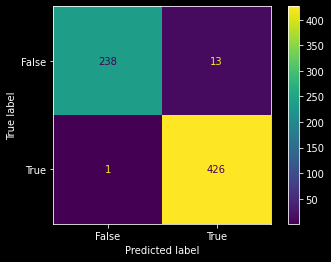

In [61]:
actual = df
predicted =labels_test

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

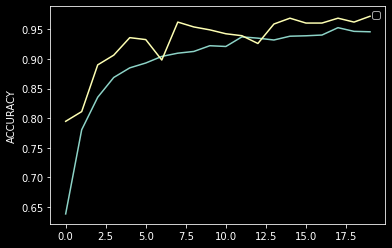

In [62]:
plt.plot(vgg16_lstm_Model.history["accuracy"])
plt.plot(vgg16_lstm_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

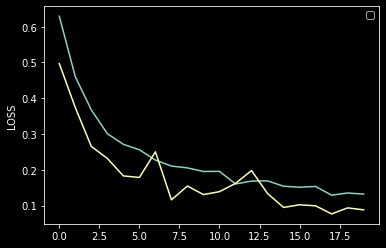

In [65]:
plt.plot(vgg16_lstm_Model.history["loss"])
plt.plot(vgg16_lstm_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

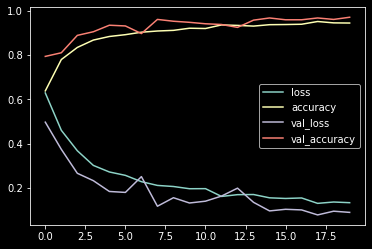

In [66]:
Dict_Summary = pd.DataFrame(vgg16_lstm_Model.history)
Dict_Summary.plot()